In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv", sep=",", encoding='utf-8')

In [3]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [5]:
X = df.drop('Diabetes_binary',axis=1)
y = df['Diabetes_binary']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test, test_size=0.5, random_state=42, stratify=y_test)

X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)

# Validation Data
X_val=X_val.reset_index(drop=True)
y_val=y_val.reset_index(drop=True)

# Test Data
X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)
    
    
print("\n********** Data Shape after Splitting **********\n")
print("\nX_train: ", X_train.shape)
print("\nX_val: ", X_val.shape)
print("\nX_test: ", X_test.shape)
    
print("\n********** Data View after Splitting **********\n")
print("\nX_train:\n", X_train.head(3))
print("\nX_val:\n", X_val.head(3))
print("\nX_test:\n", X_test.head(3))
    


********** Data Shape after Splitting **********


X_train:  (35346, 21)

X_val:  (17673, 21)

X_test:  (17673, 21)

********** Data View after Splitting **********


X_train:
    HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0     0.0       0.0        1.0  22.0     0.0     0.0                   0.0   
1     1.0       1.0        1.0  32.0     0.0     0.0                   0.0   
2     0.0       1.0        1.0  32.0     1.0     0.0                   1.0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0           1.0     1.0      1.0  ...            1.0          0.0      1.0   
1           1.0     1.0      1.0  ...            1.0          0.0      2.0   
2           0.0     1.0      1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income  
0       2.0       0.0       0.0  0.0   4.0        6.0     8.0  
1       0.0       0.0       0.0  1.0  10.0        5.0     5.0  
2   

In [8]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [9]:
pd.DataFrame(scaled_X_train).head(3)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.135320,-1.052291,0.159696,-1.102946,-0.954630,-0.258503,-0.418409,0.651048,0.795368,0.52091,...,0.215886,-0.323201,-1.650048,-0.210409,-0.577881,-0.58469,-0.915720,-1.603205,1.054722,1.056576
1,0.880809,0.950308,0.159696,0.307316,-0.954630,-0.258503,-0.418409,0.651048,0.795368,0.52091,...,0.215886,-0.323201,-0.750632,-0.458033,-0.577881,-0.58469,1.092037,0.497345,0.081323,-0.322513
2,-1.135320,0.950308,0.159696,0.307316,1.047527,-0.258503,2.390003,-1.535984,0.795368,0.52091,...,0.215886,-0.323201,-0.750632,-0.458033,-0.577881,-0.58469,1.092037,1.547620,0.081323,0.596880


In [10]:
lr_model = LogisticRegressionCV(cv=10, 
                                random_state=42, 
                                verbose=0)
lr_model.fit(scaled_X_train, y_train)

LogisticRegressionCV(cv=10, random_state=42)

In [11]:
y_pred = lr_model.predict(scaled_X_test)
y_pred

array([0., 0., 0., ..., 1., 1., 1.])

In [12]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[6429, 2408],
       [2092, 6744]])

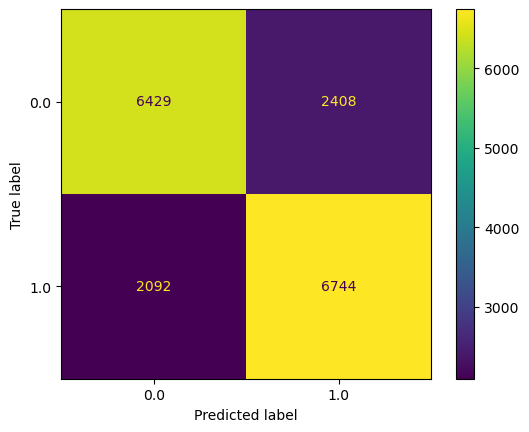

In [13]:
confusion_display = ConfusionMatrixDisplay(confusion_matrix=matrix,
                                          display_labels=lr_model.classes_)
confusion_display.plot()

plt.show()


In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74      8837
         1.0       0.74      0.76      0.75      8836

    accuracy                           0.75     17673
   macro avg       0.75      0.75      0.75     17673
weighted avg       0.75      0.75      0.75     17673

